<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Intro_to_Deep_Learning_Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from keras.datasets import reuters

In [0]:
vocabulary=7500 # we will only use the 7500 most frequently used words

Next block of code block has been commented out because it does not work anymore

In [0]:
# save np.load
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)

# restore np.load for future normal usage
#np.load = np_load_old

In [0]:
np.load.__defaults__=(None, True, True, 'ASCII')
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=vocabulary)
np.load.__defaults__=(None, False, True, 'ASCII')

2113536/2110848 [==============================] - 0s 0us/step


In the next line of code we will print the lists that contain sequences of words represented by a word index. If the text has not been converted to a sequence of indices we would need to add one pre-processing step using Tokenizer

In [0]:
print(train_data[1]) # train_data is a list of word sequences

[1, 3267, 699, 3434, 2295, 56, 2, 2, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]


Now we will vectorize the training and test data. Basically we will create a matrix where the rows are the reviews and where the columns represent the vocabulary (7500 columns). We will set a 1 in the correct column if the word of the review matches a word of the vocabulary. This means that matrix will be rather sparse.

In [0]:
def vectorize_sequences(sequences, dimension=vocabulary):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

Now we apply the function to our training and test data as well as the labels. 

In [0]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(vocabulary,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

Validation Set

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val)) #history object contains training details - object has a member dictionary

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 218us/step - loss: 2.5689 - acc: 0.4974 - val_loss: 1.6846 - val_acc: 0.6380
Epoch 2/20
7982/7982 [==============================] - 1s 124us/step - loss: 1.3970 - acc: 0.7102 - val_loss: 1.2578 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 125us/step - loss: 1.0392 - acc: 0.7804 - val_loss: 1.0986 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.8237 - acc: 0.8234 - val_loss: 0.9920 - val_acc: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.6658 - acc: 0.8574 - val_loss: 0.9421 - val_acc: 0.7920
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.5396 - acc: 0.8852 - val_loss: 0.9013 - val_acc: 0.8110
Epoch 7/20
7982/7982 [===================

In [0]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, 21)

<function matplotlib.pyplot.show>

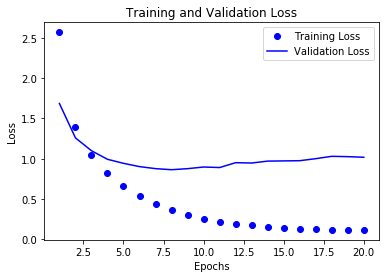

In [0]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss') #bo is for blue dotted line
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #b is for blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [0]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(vocabulary,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results=model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 150us/step - loss: 3.2731 - acc: 0.4786 - val_loss: 2.7313 - val_acc: 0.4710
Epoch 2/9
7982/7982 [==============================] - 1s 124us/step - loss: 2.3347 - acc: 0.3867 - val_loss: 2.0558 - val_acc: 0.3590
Epoch 3/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.7876 - acc: 0.3519 - val_loss: 1.6730 - val_acc: 0.3540
Epoch 4/9
7982/7982 [==============================] - 1s 123us/step - loss: 1.4030 - acc: 0.3519 - val_loss: 1.4549 - val_acc: 0.3550
Epoch 5/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.1802 - acc: 0.3807 - val_loss: 1.2141 - val_acc: 0.7000
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.7613 - acc: 0.8338 - val_loss: 0.9595 - val_acc: 0.7900
Epoch 7/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.5733 - acc: 0.8809 - val_loss: 0.9986 - val_acc: 0.7950
Epoch 8

In [0]:
print(results)

[nan, 0.7894033837934105]
